In [1]:
# Dependencies and setup
import pandas as pd
import os

# csv paths
kaggle_path = "Resources/kaggle_clean.csv"
dow_path = "Resources/dow_clean.csv"
indu_path = "Resources/indu_clean.csv"
spy_path = "Resources/spy_clean.csv"

# Read the csv files into dataframes - NEW update to to avoid overwriting the file path variables
kaggle_df = pd.read_csv(kaggle_path)
dow_df = pd.read_csv(dow_path)
indu_df = pd.read_csv(indu_path)
spy_df = pd.read_csv(spy_path)

In [2]:
# Create list of DataFrames
all_csvs = [kaggle_df, dow_df, indu_df, spy_df]

# Process each DataFrame
for df in all_csvs:   
    columns = df.columns.tolist()
    columns = ['symbol'] + [col for col in columns if col != 'symbol']
    df = df.sort_values(by="date", ascending=True)
    df = df[columns]
    df = df.round(2)
    print(f"{df.head()}")



      symbol        date   open   high    low  close    volume
0       NVDA  2014-06-02   4.76   4.80   4.70   4.74  18150000
10056   PANW  2014-06-02  25.04  25.06  24.00  24.56   6110100
12571    NOW  2014-06-02  52.33  52.34  49.46  50.26   3069100
2515    META  2014-06-02  63.23  63.59  62.05  63.08  35996000
15086    AMD  2014-06-02   4.03   4.03   3.94   3.97  10859500
     symbol        date   open   high    low  close   volume
1309    DOW  2019-03-20  52.75  53.50  49.50  49.80  2350838
1308    DOW  2019-03-21  49.99  50.00  48.20  48.98  1764671
1307    DOW  2019-03-22  48.80  49.95  48.16  48.60   844690
1306    DOW  2019-03-25  48.60  49.40  48.00  49.15   440892
1305    DOW  2019-03-26  49.00  49.75  48.18  48.85   504734
     symbol        date  open  high  low  close  volume
1704   INDU  2017-08-21  9.81  9.81  9.7   9.70   52682
1703   INDU  2017-08-22  9.70  9.70  9.7   9.70   27295
1702   INDU  2017-08-23  9.70  9.70  9.7   9.70       5
1701   INDU  2017-08-24  9.70  9

In [3]:
# Combine kaggle data and index csvs into one csv
master_df = pd.concat(all_csvs, ignore_index=True)
master_df


,symbol,date,open,high,low,close,volume
0,NVDA,2014-06-02,4.7650,4.795,4.6950,4.7350,18150000
1,NVDA,2014-06-03,4.7450,4.750,4.6525,4.7150,24321200
2,NVDA,2014-06-04,4.7025,4.755,4.7000,4.7200,16123600
3,NVDA,2014-06-05,4.7275,4.755,4.7000,4.7400,18869600
4,NVDA,2014-06-06,4.7625,4.800,4.7450,4.7575,16105200
...,...,...,...,...,...,...,...
26483,SPY,2017-08-28,245.1700,245.200,244.0900,244.5700,40565606
26484,SPY,2017-08-25,244.9000,245.610,244.3900,244.5600,64445912
26485,SPY,2017-08-24,245.0000,245.180,243.7500,243.9900,50741671
26486,SPY,2017-08-23,244.3300,245.050,244.1600,244.5600,50203837


In [4]:
#define path to Resources folder
resources_path = "Resources"

file_path = os.path.join(resources_path, "master.csv")
master_df.to_csv(file_path, index=False, header=True)

In [5]:
#reading df svc file
master_df = pd.read_csv(file_path)

In [6]:
# FILTER DATA to ensure that we compare the stok for the same period, we set up data frame based on data periods avaiailble for free actross all stocks and indicies

# Convert 'date' column to datetime type to ensure correct filtering
master_df['date'] = pd.to_datetime(master_df['date'])

# Define the date range we want to filter our data
start_date = '2019-03-20'
end_date = '2024-05-28'

# Filter the DataFrame based on the date range
filtered_df = master_df[(master_df['date'] >= start_date) & (master_df['date'] <= end_date)]

# Remove rows where the symbol is 'INDU' as this is not an AI company, but another index like S&P500 and Dow Jone (INDU is outside of our project scope)
filtered_df = filtered_df[filtered_df['symbol'] != 'INDU']

# Set 'date' column as the index
filtered_df.set_index('date', inplace=True)

# Display the first few rows to check the result
print(filtered_df.head())



           symbol       open       high        low      close    volume
date                                                                   
2019-03-20   NVDA  44.220001  44.757500  43.250000  43.599998  71914800
2019-03-21   NVDA  43.832500  46.250000  43.782501  45.985001  82431200
2019-03-22   NVDA  45.709999  46.200001  44.235001  44.375000  74764400
2019-03-25   NVDA  43.965000  44.612499  42.777500  43.445000  52521200
2019-03-26   NVDA  44.872501  45.437500  43.650002  44.217499  70350800


In [7]:
# Save the filtered DataFrame to a new CSV file (an extra step for better visibility of refined cleaned data)
output_path = os.path.join(resources_path, "filtered_master.csv")
filtered_df.to_csv(output_path, index=True, header=True)

In [8]:
#reading df svc file
df = pd.read_csv(output_path)

In [9]:
# THIS CODE COUNTS DAILY RETURNS FOR EACH DAY FOR EACH SYMBOL (STOCK)
# Data is sorted by the stock/symbol and then by year for convenience in the following calculations

# Convert 'date' column to datetime type to be on the safe side as we merge several data sets
df['date'] = pd.to_datetime(df['date'])

# Sort DataFrame by 'symbol' and 'date' to ensure our merged (updated) data is sorted.
df = df.sort_values(by=['symbol', 'date'], ascending=[True, True])

# Calculate the daily return for each symbol
# It is calculated as: (current day's close - previous day's close) / previous day's close
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

# Display the first few rows to check the result
print(df.head(10))

# Save the result to a new CSV file
df.to_csv('Resources/daily_returns_master.csv', index=False)

            date symbol        open        high         low       close  \
11237 2020-12-09     AI  100.000000  115.000000   90.029999   92.489998   
11238 2020-12-10     AI   99.480003  131.746002   96.000000  130.000000   
11239 2020-12-11     AI  123.820000  133.000000  116.000000  119.580002   
11240 2020-12-14     AI  122.160004  123.830002  100.660004  102.360001   
11241 2020-12-15     AI  104.570000  109.889999   98.099998  102.000000   
11242 2020-12-16     AI  105.000000  116.709999  104.000000  113.690002   
11243 2020-12-17     AI  118.440002  121.000000  115.449997  117.239998   
11244 2020-12-18     AI  116.669998  145.000000  115.089996  137.589996   
11245 2020-12-21     AI  142.014008  168.770004  141.000000  160.889999   
11246 2020-12-22     AI  170.529999  179.000000  163.300003  177.470001   

         volume  daily_return  
11237  24805600           NaN  
11238  22839500      0.405557  
11239  11758600     -0.080154  
11240   8197500     -0.144004  
11241   571530

In [10]:
# THIS CODE COUNTS AVERAGE DAILY RETURNS AND CLOSING PRICES PER EACH YEAR FOR EACH STOCK TO TRACK PERFORMANCE CHANGES YEAR OVER YEAR
# THIS CODE ALSO CALCULATES VOLATILITY (the standard deviation of daily returns for each symbol and year)

# The data is sorted by the average daily return in descennding order to reveal best/worst performers in each year (sorted by the year as well)

# Convert 'date' column to datetime type to be on the safe side as we merge several data sets
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date
df['year'] = df['date'].dt.year

# Calculate the daily return for each symbol
# The daily return is calculated as: (current day's close - previous day's close) / previous day's close
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

# Calculate the average daily return and average closing price for each symbol and year
average_daily_return = df.groupby(['symbol', 'year'])['daily_return'].mean().reset_index()
average_closing_price = df.groupby(['symbol', 'year'])['close'].mean().reset_index()

# Calculate the median closing price for each symbol and year
median_closing_price = df.groupby(['symbol', 'year'])['close'].median().reset_index()

# Calculate volatility (standard deviation of daily returns) for each symbol and year
volatility = df.groupby(['symbol', 'year'])['daily_return'].std().reset_index()

# Rename columns for better clarity
average_daily_return.rename(columns={'daily_return': 'average_daily_return'}, inplace=True)
average_closing_price.rename(columns={'close': 'average_closing_price'}, inplace=True)
median_closing_price.rename(columns={'close': 'median_closing_price'}, inplace=True)
volatility.rename(columns={'daily_return': 'volatility'}, inplace=True)

# Merge the DataFrames on 'symbol' and 'year'
average_daily_statistics = pd.merge(average_daily_return, average_closing_price, on=['symbol', 'year'])
average_daily_statistics = pd.merge(average_daily_statistics, median_closing_price, on=['symbol', 'year'])
average_daily_statistics = pd.merge(average_daily_statistics, volatility, on=['symbol', 'year'])

# Sort the resulting DataFrame by 'year' and then by 'average_daily_return' in descending order
# Such sorting helps to indentify best and worst performers each year
average_daily_statistics = average_daily_statistics.sort_values(by=['year', 'average_daily_return'], ascending=[True, False])

# Save the result to a new CSV file
average_daily_statistics.to_csv('Resources/average_daily_statistics.csv', index=False)

# Display the average daily statistics to ensure we receive the results in the intended format
print(average_daily_statistics.head(3))




   symbol  year  average_daily_return  average_closing_price  \
5     AMD  2019              0.003357              31.996985   
63   TSLA  2019              0.002608              17.666714   
41   NVDA  2019              0.001772              45.159284   

    median_closing_price  volatility  
5              30.690001    0.029594  
63             16.319332    0.030528  
41             44.522499    0.022850  


In [11]:
# Display companies with the lowest average daily returns in 2024:
print(average_daily_statistics.tail(3))

# the out put above shows that AMD, Tesla, and NVIDIA had the best average daily returns in 2019.
# in 2019 INDU, PATH, TSLA had the lowest avarage daily returns (please see 5 rows below)

   symbol  year  average_daily_return  average_closing_price  \
4      AI  2024             -0.000895              26.397647   
56   PATH  2024             -0.002413              22.040882   
68   TSLA  2024             -0.002730             185.618530   

    median_closing_price  volatility  
4                 26.165    0.041751  
56                22.570    0.026201  
68               180.000    0.035188  


In [12]:
# THIS CODE COUNTS CUMULATIVE RETURNS OF EACH YEAR FOR EACH SYMBOL (STOCK):
# Cumulative return has a compount effect, and it explains why some companies like NVDIA had a postive average deily returns,
# but got a slightly negative cumulative returns 

# Load the new CSV file
data_path = 'Resources/daily_returns_master.csv'
yearly_df = pd.read_csv(data_path)

# Convert 'date' column to datetime type to be on the safe side as we merge several data sets
yearly_df['date'] = pd.to_datetime(yearly_df['date'])

# Extract the year from the date
yearly_df['year'] = yearly_df['date'].dt.year

# Ensure daily returns are numerical to ensure correct calculations
if yearly_df['daily_return'].dtype == 'object':
    yearly_df['daily_return'] = yearly_df['daily_return'].str.rstrip('%').astype('float') / 100.0
else:
    yearly_df['daily_return'] = yearly_df['daily_return'].astype('float')

# Define a function to calculate cumulative returns
def cumulative_return(x):
    return (1 + x.dropna()).cumprod() - 1

# Apply cumulative return calculation to each group and get the last value of each year
cumulative_returns = yearly_df.groupby(['symbol', 'year'])['daily_return'].apply(cumulative_return).reset_index()

# Merge the cumulative returns back to the original DataFrame
yearly_df = yearly_df.merge(cumulative_returns[['symbol', 'year', 'daily_return']], on=['symbol', 'year'], how='left', suffixes=('', '_cumulative'))

# Rename the merged column to 'cumulative_return' as we need it for future computations
yearly_df.rename(columns={'daily_return_cumulative': 'cumulative_return'}, inplace=True)

# Drop duplicates and NaN values to ensure correct calculations
yearly_df.drop_duplicates(subset=['symbol', 'year'], inplace=True)
yearly_df.dropna(subset=['cumulative_return'], inplace=True)

# Sort the DataFrame by 'year' and 'cumulative_return' in descending order to easily identify the best and worst performing companies/indices each year.
yearly_df = yearly_df.sort_values(by=['year', 'cumulative_return'], ascending=[True, False])

# Save the result to a new CSV file
output_path = 'Resources/yearly_returns_master.csv'
yearly_df.to_csv(output_path, index=False)

# Display the first few rows to check the result
print(yearly_df.head(3))

## IMPORTANT: this code shows the value of cumulative return on the row with the first date of the corresponding year.
#NaN in the first raw for daily returns because it's the 1st date of our preiod wihtout closing price of the previos day-cannot be calculated
## this way we can track stocks that appeared on the stock market later or to highlight the data limitation of the free data we exported

#This data is sorted by the year and the highest cumulative return

              date symbol       open       high        low      close  \
199649  2019-03-20    AMD  26.490000  26.879999  25.309999  25.700001   
805289  2019-03-20   ANET  74.387497  75.004997  73.735001  74.612503   
2016569 2019-03-20   NVDA  44.220001  44.757500  43.250000  43.599998   

            volume  daily_return  year  cumulative_return  
199649   151292100           NaN  2019           0.085214  
805289     2368800           NaN  2019           0.055520  
2016569   71914800           NaN  2019           0.054702  


In [13]:
#The output above shows the best 3 performing stocks in 2019 based on cimulative returns.

#The output below shows the 3 worst performing stocks in 2024 based on cimulative returns. 
print(yearly_df.tail(3))

              date symbol        open        high         low       close  \
2308985 2024-01-02   NVDA  492.440002  492.950012  475.950012  481.679993   
2779216 2024-01-02   PATH   24.520000   24.613001   23.629999   23.799999   
492065  2024-01-02    AMD  144.279999  144.399994  137.429993  138.580002   

           volume  daily_return  year  cumulative_return  
2308985  41125400     -0.027341  2024          -0.027341  
2779216   9387900     -0.041868  2024          -0.041868  
492065   64902000     -0.059901  2024          -0.059901  


In [14]:
# THIS CODE COUNTS AVERAGE CUMULATIVE RETURNS AND AV.CLOSING PRICES FOR THE LAST 5 YEARS FOR EACH STOCK TO DISPLAY OVERALL COMPANY STANDING IN THE ANALYZED PERIOD

 # Ensure daily returns have numeric values
if yearly_df['daily_return'].dtype == 'object':
    yearly_df['daily_return'] = pd.to_numeric(yearly_df['daily_return'].str.rstrip('%'), errors='coerce') / 100.0
else:
    yearly_df['daily_return'] = pd.to_numeric(yearly_df['daily_return'], errors='coerce')

# Ensure 'close' column is numeric
yearly_df['close'] = pd.to_numeric(yearly_df['close'], errors='coerce')

# Drop rows with NaN values in 'daily_return' or 'close' columns
yearly_df.dropna(subset=['daily_return', 'close'], inplace=True)

# Calculate the average yearly returns and average yearly closing prices for each symbol
average_yearly_return = yearly_df.groupby(['symbol', 'year'])['daily_return'].mean().reset_index()
average_yearly_closing_price = yearly_df.groupby(['symbol', 'year'])['close'].mean().reset_index()

# Calculate the average return and average closing price across all years for each symbol
average_yearly_return = average_yearly_return.groupby('symbol')['daily_return'].mean().reset_index()
average_yearly_closing_price = average_yearly_closing_price.groupby('symbol')['close'].mean().reset_index()

# Rename columns for clarity
average_yearly_return.rename(columns={'daily_return': 'average_yearly_return'}, inplace=True)
average_yearly_closing_price.rename(columns={'close': 'average_yearly_closing_price'}, inplace=True)

# Round the 'average_yearly_return' to 10 decimal places
average_yearly_return['average_yearly_return'] = average_yearly_return['average_yearly_return']

# Merge the two DataFrames on 'symbol'
average_yearly_statistics = pd.merge(average_yearly_return, average_yearly_closing_price, on='symbol')

# Sort the resulting DataFrame by 'average_yearly_return' in descending order
average_yearly_statistics = average_yearly_statistics.sort_values(by='average_yearly_return', ascending=False)

# Save the result to a new CSV file
average_yearly_statistics.to_csv('Resources/average_yearly_statistics.csv', index=False)

# Display the average yearly statistics
print(average_yearly_statistics)

   symbol  average_yearly_return  average_yearly_closing_price
11   TSLA               0.015065                    205.677466
1     AMD               0.009932                     98.848001
2    AMZN               0.007224                    132.077296
5    META               0.005605                    257.658003
7    NVDA               0.000082                    223.430495
10    SPY              -0.001656                    404.968000
4     DOW              -0.003947                     54.206000
8    PANW              -0.008614                    160.892670
3    ANET              -0.009983                    123.336002
6     NOW              -0.014898                    504.246008
9    PATH              -0.019252                     26.653333
0      AI              -0.027785                     48.030000


In [15]:
print(average_daily_statistics) #verifying if no issues with this variable


   symbol  year  average_daily_return  average_closing_price  \
5     AMD  2019              0.003357              31.996985   
63   TSLA  2019              0.002608              17.666714   
41   NVDA  2019              0.001772              45.159284   
29   META  2019              0.001214             187.937738   
35    NOW  2019              0.000953             265.171809   
..    ...   ...                   ...                    ...   
28    DOW  2024              0.000619              56.416471   
40    NOW  2024              0.000474             751.299313   
4      AI  2024             -0.000895              26.397647   
56   PATH  2024             -0.002413              22.040882   
68   TSLA  2024             -0.002730             185.618530   

    median_closing_price  volatility  
5              30.690001    0.029594  
63             16.319332    0.030528  
41             44.522499    0.022850  
29            188.250000    0.015747  
35            265.859985    0.021432

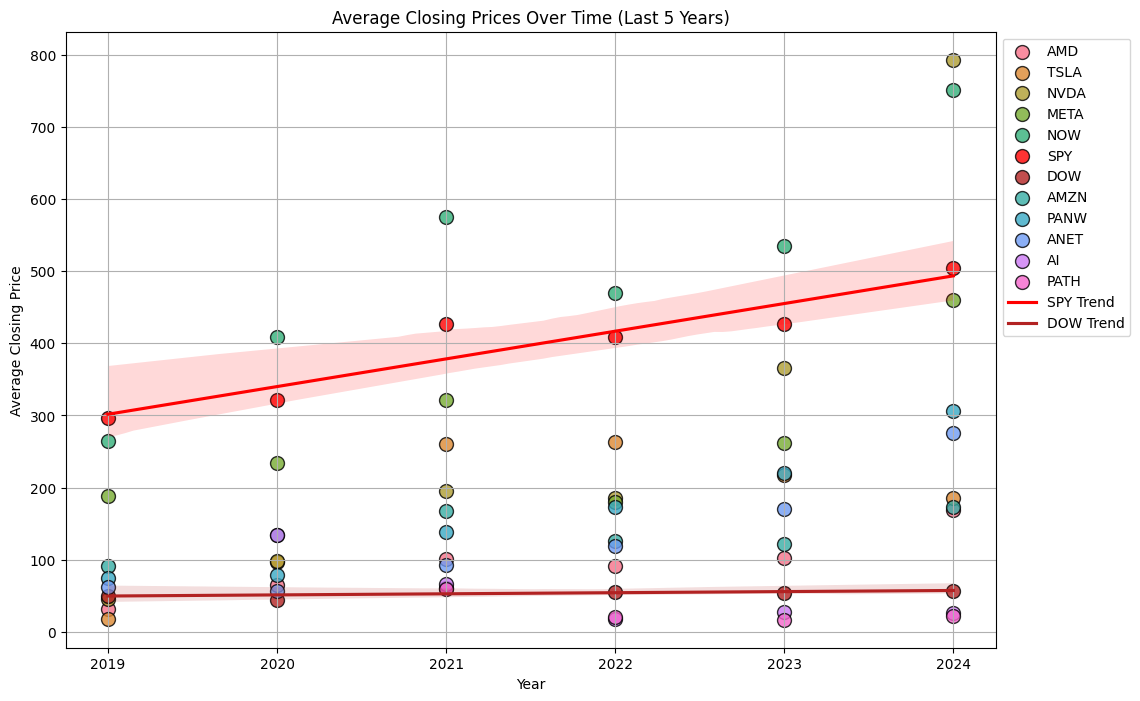

In [16]:
#Scatter plotshowing average closing prices with lines for S&P 500 and Dow Jones for better visibility of our comparison
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'year' column is recongnized as a categorical variable
average_daily_statistics['year'] = average_daily_statistics['year'].astype(str)

# Ensure a year has a numerical value for regression calculation
average_daily_statistics['year_num'] = average_daily_statistics['year'].astype(int)

# Set up the plot size
plt.figure(figsize=(12, 8))

# Set different shades of red color for S&P 500 and Dow Jones for better visualization since we compare them to other AI companies
special_colors = {
    'SPY': 'red',  # SPY is the symbol for S&P 500
    'DOW': '#B22222', # DOW is the symbol for Dow Jones
}

# Get a list of unique symbols excluding SPY and DOW to esure other stocks have different colors on the graph
unique_symbols = [symbol for symbol in average_daily_statistics['symbol'].unique() if symbol not in special_colors]

# Generate a color palette for the remaining symbols to differentiate AI companies from S&P500 and Dow Jones
palette = sns.color_palette("husl", len(unique_symbols))

# Create a color map for all symbols
color_map = {symbol: color for symbol, color in zip(unique_symbols, palette)}
color_map.update(special_colors)

# Setting scatter points for each company
for symbol in average_daily_statistics['symbol'].unique():
    subset = average_daily_statistics[average_daily_statistics['symbol'] == symbol]
    color = color_map[symbol]
    plt.scatter(subset['year_num'], subset['average_closing_price'], label=symbol, color=color, alpha=0.8, edgecolors='black', s=100)

# Add regression lines for SPY and DOW symbols to better visualization of our comparison
for symbol in ['SPY', 'DOW']:
    subset = average_daily_statistics[average_daily_statistics['symbol'] == symbol]
    sns.regplot(x='year_num', y='average_closing_price', data=subset, scatter=False, color=special_colors[symbol], label=f'{symbol} Trend')

# Add plot details
plt.title('Average Closing Prices Over Time (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Save the figure
plt.savefig('Plots/average_closing_prices_over_time.png', bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_39284/2139053325.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['average_daily_return'] = filtered_df['average_daily_return'] * 100


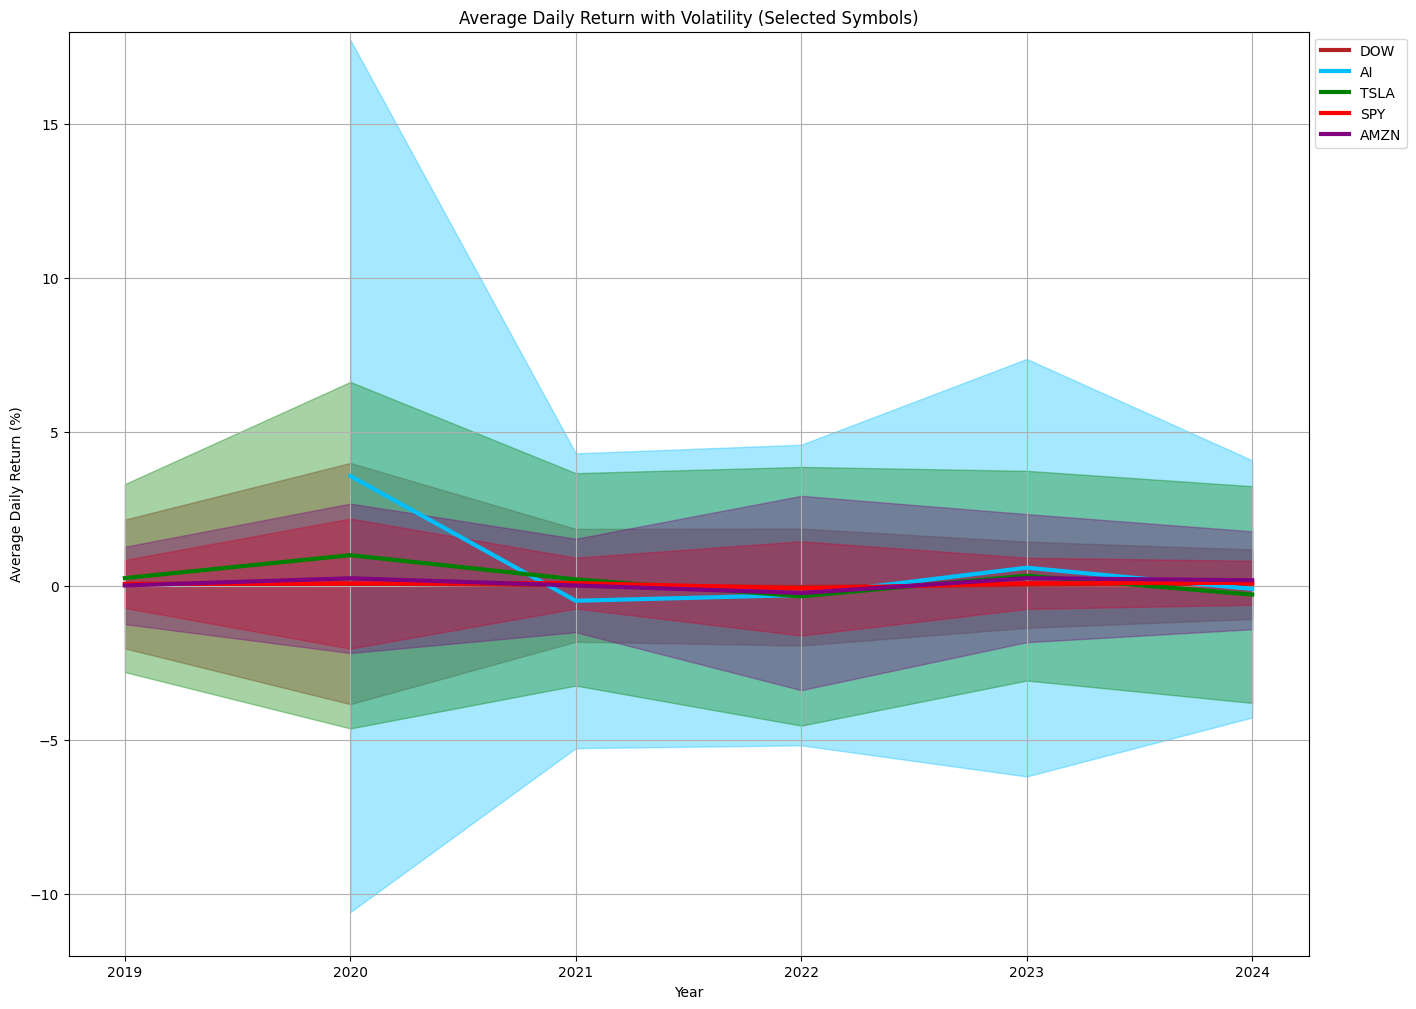

In [17]:
import seaborn as sns

# Calculate the average volatility for each symbol over the whole analysed peiod
average_volatility = average_daily_statistics.groupby('symbol')['volatility'].mean().reset_index()

# Identify the two symbols with the highest average volatility
top_2_volatility_symbols = average_volatility.nlargest(2, 'volatility')['symbol']

# Identify the two symbols with the lowest average volatility
lowest_2_volatility_symbols = average_volatility.nsmallest(2, 'volatility')['symbol']

# Combine the symbols of interest (SPY, DOW, top 2 highest volatility, and lowest 2 lowest volatility)
symbols_of_interest = ['DOW'] + top_2_volatility_symbols.tolist() + lowest_2_volatility_symbols.tolist()

# Filter the DataFrame to include only the symbols of interest
filtered_df = average_daily_statistics[average_daily_statistics['symbol'].isin(symbols_of_interest)]

# Define specific colors for the symbols
color_map = {
    'SPY': 'red',
    'DOW': '#B22222',
    top_2_volatility_symbols.iloc[0]: '#00BFFF',
    top_2_volatility_symbols.iloc[1]: 'green',
    # lowest_2_volatility_symbols.iloc[0]: 'orange', this line was commended to remove conflists as SPY was identified as the least volatile sybmol
    lowest_2_volatility_symbols.iloc[1]: 'purple' 
}

# Convert average daily returns to percentage to make the graph easier on an eye
filtered_df['average_daily_return'] = filtered_df['average_daily_return'] * 100

# Set up the plot
plt.figure(figsize=(16, 12))

# Plot for each symbol
for symbol in symbols_of_interest:
    symbol_df = filtered_df[filtered_df['symbol'] == symbol]
    x = symbol_df['year']
    y = symbol_df['average_daily_return']
    volatility = symbol_df['volatility'] * 100  # Convert volatility to percentage
    
    color = color_map[symbol]
    
    plt.plot(x, y, label=symbol, color=color, linewidth=3)
    plt.fill_between(x, y - volatility, y + volatility, color=color, alpha=0.35)

# Set y-axis limits for better visualization
plt.ylim(-12, 18)

# Add plot details
plt.title('Average Daily Return with Volatility (Selected Symbols)')
plt.xlabel('Year')
plt.ylabel('Average Daily Return (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Save the figure in png format
plt.savefig('Plots/average_daily_return_with_volatility_selected_symbols.png', bbox_inches='tight')

# Show the plot 
plt.show()


In [18]:
# print 2 safest stocks among analysed with the lowest volatility
lowest_2_volatility_symbols 

10     SPY
2     AMZN
Name: symbol, dtype: object

In [19]:
# printing 2 companies with the highest volatility (associated with higher risks)
top_2_volatility_symbols

0       AI
11    TSLA
Name: symbol, dtype: object

In [20]:
# Convert 'date' column to datetime to ensure correct computations
df['date'] = pd.to_datetime(df['date'])
unique_years = [2019, 2020, 2021, 2022, 2023, 2024]

# Set red colors for S&P 500 and Dow Jones for better visualization where they are in comparison to other AI companies
special_colors = {
    'SPY': 'red',  # SPY is the symbol for S&P 500
    'DOW': 'red',  # DOW is the symbol for Dow Jones
}

# Get a list of unique symbols excluding SPY and DOW
unique_symbols = [symbol for symbol in df['symbol'].unique() if symbol not in special_colors]

# Generate a bright color palette for the remaining symbols to defirentiate AI companies from S&P500 and Dow Jones
palette = sns.color_palette("husl", len(unique_symbols))

# Create a color map for all symbols
color_map = {symbol: color for symbol, color in zip(unique_symbols, palette)}
color_map.update(special_colors)

# Filter data for a specific year (e.g., 2022)
for year in unique_years:
    df_year = df[df['date'].dt.year == year]

    # Create a separate plot for each stock
    stocks = df_year['symbol'].unique()
    for stock in stocks:
        df_stock = df_year[df_year['symbol'] == stock]
        color = color_map[stock]
        
        plt.figure(figsize=(10, 6))
        plt.plot(df_stock['date'], df_stock['daily_return'], label=stock, color=color)
        plt.xlabel("Year")
        plt.ylabel("Overall Daily Returns")
        plt.title(f"Overall Daily Returns for {stock} in {year}")
        plt.legend(loc="best")
        plt.grid(True)
        plt.savefig(f'Daily_Return_Plots/{stock}_in_{year}.png', bbox_inches='tight')
        plt.close()  # Close the plot to avoid displaying it

    #Show the plot
    # commented this line below  to have a clean code: while these graphs are interesting for investing analysis, they are not superrelevant for the goal of our project
    # plt.show () 
       
        

In [21]:
# Pivot the DataFrame to have symbols as rows, years as columns, and avg_daily_return as values
df_pivot = average_daily_statistics.pivot(index="symbol", columns="year", values="average_daily_return")

# Plotting the average daily returns for each stock
df_pivot.T.plot(kind="line", marker="o")
plt.xlabel('Years')
plt.ylabel('Average Daily Return')
plt.title('Change of Average Daily Returns for Each Stock')
plt.legend(title='Years', loc = "best")
plt.grid(True)
plt.savefig(f'Plots/Average_Daily_Returns.png', bbox_inches='tight')

# plt.show() commented this plot as we used an improved version (please see below)
plt.close()  # Close the plot to avoid displaying it

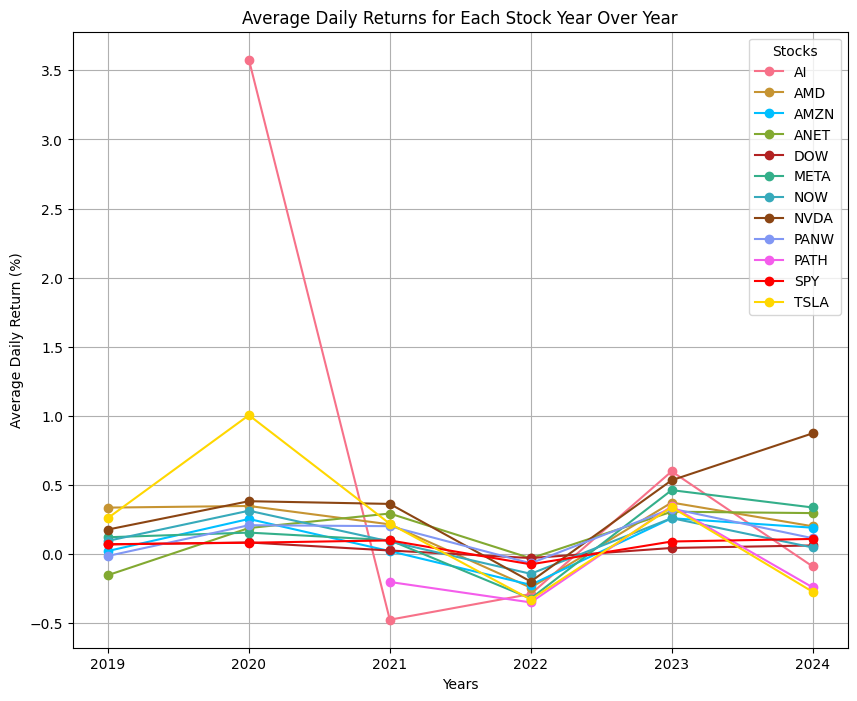

In [22]:
# This codes refines the graph above for better visualization
# Pivot the DataFrame to have symbols as rows, years as columns, and average_closing_price as values
df_pivot_new = average_daily_statistics.pivot(index="symbol", columns="year", values="average_daily_return")

# Convert average daily returns to percentage to make it easier to absorb the information visually
df_pivot_new = df_pivot_new * 100

# Define specific colors for SPY and DOW, and a color map for other symbols to ensure symbils have different colors (do not reapeat)
color_map = {
    'SPY': 'red',
    'DOW': '#B22222',
    'NVDA': '#8B4513',
    'AMZN': '#00BFFF',
    'TSLA': '#FFD700'
}

# Generate a color palette for the other symbols using "husl" for bright distinct colors
other_symbols = [symbol for symbol in df_pivot.index if symbol not in color_map]
palette = sns.color_palette("husl", len(other_symbols))

# Filter out colors that are shades of red
filtered_palette = [color for color in palette if not (0.9 <= color[0] <= 1.0 and color[1] < 0.6 and color[2] < 0.6)]

# Assign colors to other symbols
for symbol, color in zip(other_symbols, palette):
    color_map[symbol] = color

# Set up the plot with increased size
plt.figure(figsize=(10, 8))

# Plotting the average closing prices for each stock with specific colors
for symbol in df_pivot_new.index:
    color = color_map[symbol]
    plt.plot(df_pivot_new.columns, df_pivot_new.loc[symbol], marker="o", label=symbol, color=color)

# Add plot details
plt.xlabel('Years')
plt.ylabel('Average Daily Return (%)')
plt.title('Average Daily Returns for Each Stock Year Over Year')
plt.legend(title='Stocks', loc='best')
plt.grid(True)


# Save the figure
plt.savefig('Plots/Average_Daily_Returns_New.png', bbox_inches='tight')


In [23]:
print(average_daily_statistics.head(10))

   symbol  year  average_daily_return  average_closing_price  \
5     AMD  2019              0.003357              31.996985   
63   TSLA  2019              0.002608              17.666714   
41   NVDA  2019              0.001772              45.159284   
29   META  2019              0.001214             187.937738   
35    NOW  2019              0.000953             265.171809   
57    SPY  2019              0.000706             296.518191   
23    DOW  2019              0.000695              50.386985   
11   AMZN  2019              0.000219              91.359309   
47   PANW  2019             -0.000140              74.033015   
17   ANET  2019             -0.001528              61.846281   

    median_closing_price  volatility  year_num  
5              30.690001    0.029594      2019  
63             16.319332    0.030528      2019  
41             44.522499    0.022850      2019  
29            188.250000    0.015747      2019  
35            265.859985    0.021432      2019  
5

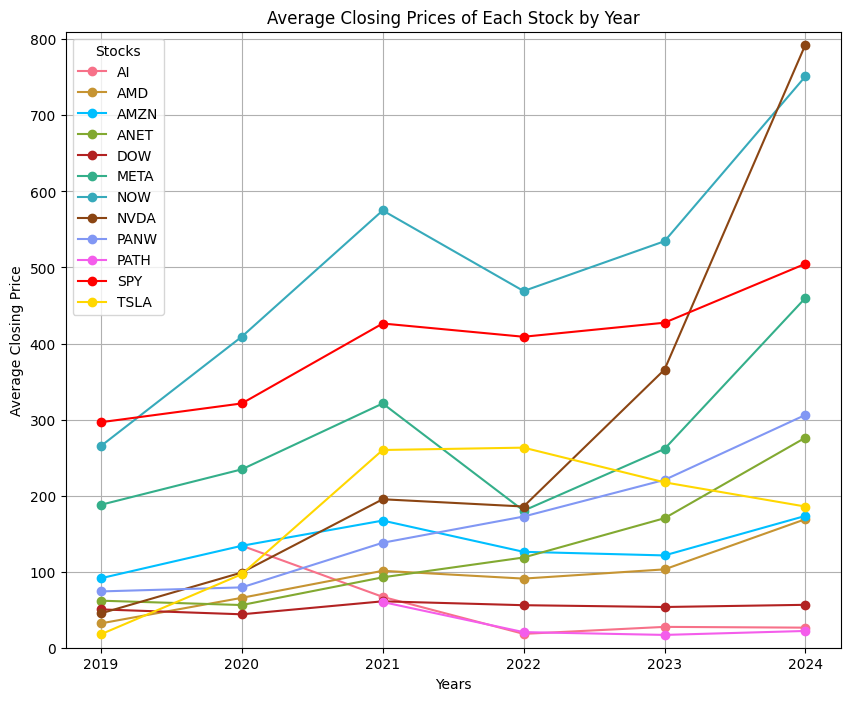

In [24]:
# Pivot the DataFrame to have symbols as rows, years as columns, and average_closing_price as values
df_pivot_price = average_daily_statistics.pivot(index="symbol", columns="year", values="average_closing_price")

# Define specific colors for SPY and DOW, and a color map for other symbols, so ensure each sybmol have different colors
# and highlight some stocks we're especially interested in tracking.
color_map = {
    'SPY': 'red',
    'DOW': '#B22222',
    'NVDA': '#8B4513',
    'AMZN': '#00BFFF',
    'TSLA': '#FFD700'
}

# Generate a color palette for the other symbols using "husl" for recognizable colors
other_symbols = [symbol for symbol in df_pivot_price.index if symbol not in color_map]
palette = sns.color_palette("husl", len(other_symbols))

# Assign colors to other symbols
for symbol, color in zip(other_symbols, palette):
    color_map[symbol] = color

# Set up the plot with an increased size for better visibility
plt.figure(figsize=(10, 8))

# Plotting the average closing prices for each stock with specific colors
for symbol in df_pivot_price.index:
    color = color_map[symbol]
    plt.plot(df_pivot_price.columns, df_pivot_price.loc[symbol], marker="o", label=symbol, color=color)

# Add plot details
plt.xlabel('Years')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Prices of Each Stock by Year')
plt.legend(title='Stocks', loc='best')
plt.grid(True)

# Set y-axis range
plt.ylim(0, 810)

# Save the figure
plt.savefig('Plots/Average_Closing_Prices.png', bbox_inches='tight')

# Show the plot
plt.show()



In [25]:
# Read the CSV file
file_path = 'Resources/average_yearly_statistics.csv'
average_yearly_statistics = pd.read_csv(file_path)
print(average_yearly_statistics.head())

  symbol  average_yearly_return  average_yearly_closing_price
0   TSLA               0.015065                    205.677466
1    AMD               0.009932                     98.848001
2   AMZN               0.007224                    132.077296
3   META               0.005605                    257.658003
4   NVDA               0.000082                    223.430495


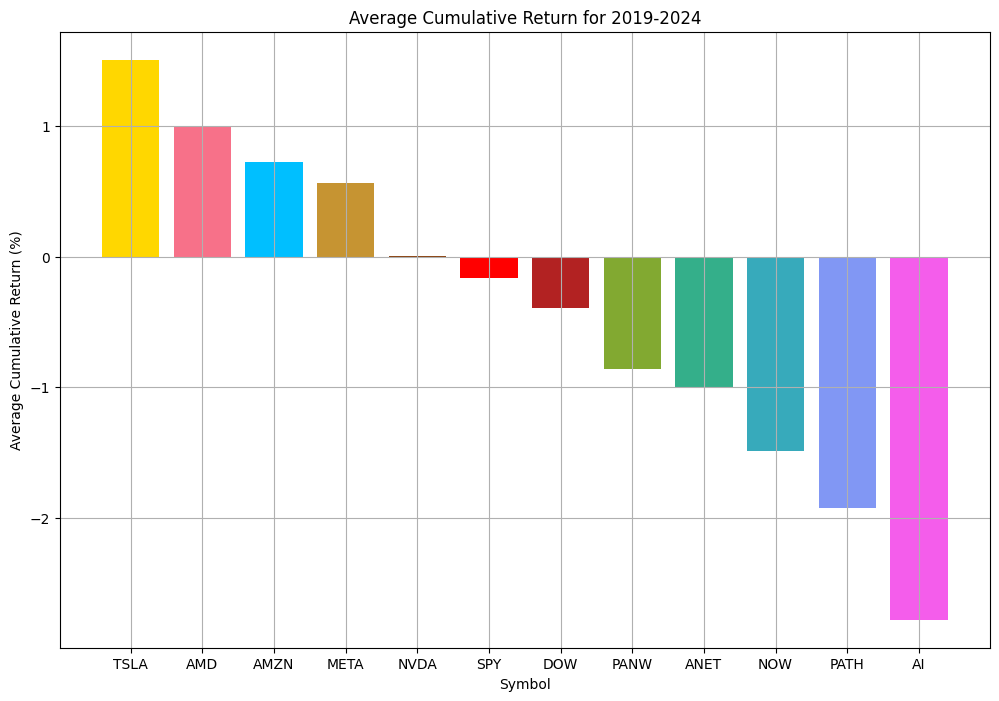

In [26]:

# Bar plot the average cumulative return from 2019 to 2024 to see an overall trend durtin analysed period

# Read the CSV file
file_path = 'Resources/average_yearly_statistics.csv'
average_yearly_statistics = pd.read_csv(file_path)

# Convert average_yearly_return to percentage format with 10 decimals
average_yearly_statistics['average_yearly_return'] = average_yearly_statistics['average_yearly_return'] * 100

# Define specific colors for some symbols, and a color map for other symbols
color_map_new = {
    'SPY': 'red',
    'DOW': '#B22222',
    'NVDA': '#8B4513',
    'AMZN': '#00BFFF',
    'TSLA': '#FFD700'
}

# Generate a color palette for the other symbols using "husl" for recognizable colors
other_symbols_new = [symbol for symbol in average_yearly_statistics['symbol'] if symbol not in color_map_new]
palette_new = sns.color_palette("husl", len(other_symbols_new))

# Assign colors to other symbols
for symbol, color in zip(other_symbols_new, palette_new):
    color_map_new[symbol] = color

# Set up the plot with an increased size for better visibility
plt.figure(figsize=(12, 8))

# Plotting the average yearly return for each symbol as a bar
bars = plt.bar(average_yearly_statistics['symbol'], average_yearly_statistics['average_yearly_return'], 
               color=[color_map_new.get(symbol, 'blue') for symbol in average_yearly_statistics['symbol']])

plt.title('Average Cumulative Return for 2019-2024')
plt.xlabel('Symbol')
plt.ylabel('Average Cumulative Return (%)')
plt.grid(True)

# Save the figure
plt.savefig('Plots/Average_Cumulative_Returns_2019-2024.png', bbox_inches='tight')

# Display the plot
plt.show()


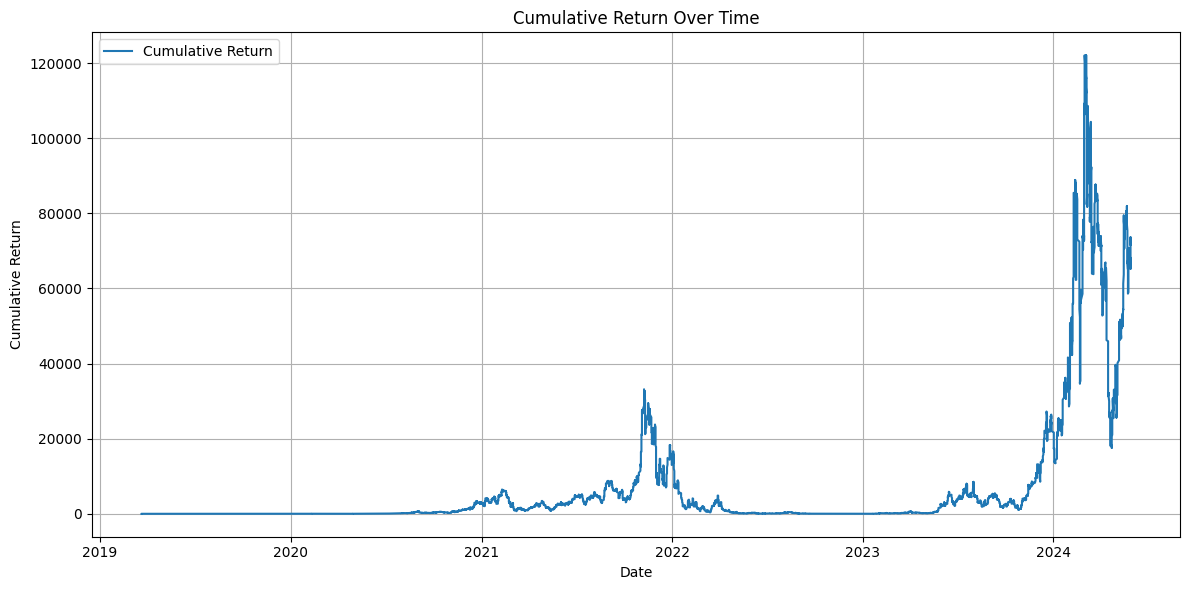

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Resources/daily_returns_master.csv'  
# Update this path
data = pd.read_csv (file_path)

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort data by date
data = data.sort_values(by='date')

# Forward-fill missing daily_return values
data['daily_return'] = data['daily_return'].ffill()

# Calculate cumulative returns
data['cumulative_return'] = (1 + data['daily_return']).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['cumulative_return'], label='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('Plots/Cumulative_return_over_time_AMMG.png', bbox_inches='tight')

# Show the plot
plt.show()

plt.close()